In [1]:
import neurokit as nk
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

reading the acqknowledge file returns both the dataframe and a sampling rate.

In [2]:
acq_df, samp_rate = nk.bio.bio_data.read_acqknowledge("sub-2002/ses-day1pre/sub-2002_ses-day1pre_0002.acq")

Neuropsydia error: get_creation_date(): We're probably on Linux. No easy way to get creation dates here, so we'll settle for when its content was last modified.


In [3]:
# see what the dataframe looks like
acq_df.head()

,PPG100C,GSR100C,RSP100C,Scanner TTL,Scanner Trigger
2019-07-10 07:45:49.774886,-0.037842,0.585939,1.594849,0.000000,5.0
2019-07-10 07:45:49.779886,-0.038147,0.585939,1.585693,0.000000,5.0
2019-07-10 07:45:49.784886,-0.039368,0.588991,1.572571,-0.001221,5.0
2019-07-10 07:45:49.789886,-0.039368,0.585939,1.555481,-0.000305,5.0
2019-07-10 07:45:49.794886,-0.039368,0.585939,1.538696,-0.001221,0.0


In [4]:
# use a bash command to look inside the correct txt file
!head -n 5 sub-2002/ses-day1pre/sub-2002_ses-day1pre_task-rest_run-2_physio.txt

-0.0378418	0.585939	1.59485	0	5	
-0.038147	0.585939	1.58569	0	5	
-0.0393677	0.588991	1.57257	-0.0012207	5	
-0.0393677	0.585939	1.55548	-0.000305176	5	
-0.0393677	0.585939	1.5387	-0.0012207	0	


In [5]:
# since there is no header in the txt file, we need to supply our own header
# in the pandas dataframe
acq_df.columns

Index(['PPG100C', 'GSR100C', 'RSP100C', 'Scanner TTL', 'Scanner Trigger'], dtype='object')

In [6]:
txt_df = pd.read_csv("sub-2002/ses-day1pre/sub-2002_ses-day1pre_task-rest_run-2_physio.txt",
            header=None,
            index_col=False,
            names=acq_df.columns,
            sep="\t")
txt_df.head()

,PPG100C,GSR100C,RSP100C,Scanner TTL,Scanner Trigger
0,-0.037842,0.585939,1.59485,0.000000,5
1,-0.038147,0.585939,1.58569,0.000000,5
2,-0.039368,0.588991,1.57257,-0.001221,5
3,-0.039368,0.585939,1.55548,-0.000305,5
4,-0.039368,0.585939,1.53870,-0.001221,0


In [7]:
# the columns are not identical
acq_df['PPG100C'].reset_index(drop=True).equals(txt_df['PPG100C'])

False

In [8]:
a = acq_df['PPG100C'].reset_index(drop=True)

In [9]:
t = txt_df['PPG100C']

In [10]:
# when we compare a column by asking if they are "close enough"
np.all(np.isclose(a, t))

True

In [11]:
# function to return dictionary mapping acq files to txt files

def match_acq_txt(acqs, txts):
    acq_txt_dict = {}
    no_acq_matches = []
    for acq in acqs:
        # read the acqknowledge file
        acq_df, samp_rate = nk.bio.bio_data.read_acqknowledge(acq)
        for txt in txts:
            # read the txt file
            txt_df = pd.read_csv(txt,
            header=None,
            index_col=False,
            names=acq_df.columns,
            sep="\t")
            
            # select this column for comparisons
            a = acq_df['PPG100C'].reset_index(drop=True)[10]
            t = txt_df['PPG100C'][10]
            
            if np.all(np.isclose(a, t)):
                acq_txt_dict[acq] = txt
                txts.remove(txt)
                break
        
        if acq not in acq_txt_dict.keys():
            no_acq_matches.append(acq)
    
    no_txt_matches = txts
    return acq_txt_dict, no_acq_matches, no_txt_matches
            

In [12]:
acqs = glob("./sub-2002/**/**.acq")

txts = glob("./sub-2002/**/**.txt")

In [13]:
acq_txt_dict, no_acq_matches, no_txt_matches = match_acq_txt(acqs, txts)

Neuropsydia error: get_creation_date(): We're probably on Linux. No easy way to get creation dates here, so we'll settle for when its content was last modified.
Neuropsydia error: get_creation_date(): We're probably on Linux. No easy way to get creation dates here, so we'll settle for when its content was last modified.
Neuropsydia error: get_creation_date(): We're probably on Linux. No easy way to get creation dates here, so we'll settle for when its content was last modified.
Neuropsydia error: get_creation_date(): We're probably on Linux. No easy way to get creation dates here, so we'll settle for when its content was last modified.
Neuropsydia error: get_creation_date(): We're probably on Linux. No easy way to get creation dates here, so we'll settle for when its content was last modified.
Neuropsydia error: get_creation_date(): We're probably on Linux. No easy way to get creation dates here, so we'll settle for when its content was last modified.
Neuropsydia error: get_creation_da

In [14]:
no_acq_matches

['./sub-2002/ses-day1pre/sub-2002_ses-day1pre_0000.acq',
 './sub-2002/ses-day1pre/sub-2002_ses-day1pre_0003.acq',
 './sub-2002/ses-day2post/sub-2002_ses-day2post_0000.acq',
 './sub-2002/ses-day2pre/sub-2002_ses-day2pre_0000.acq',
 './sub-2002/ses-day2pre/sub-2002_ses-day2pre_0001.acq',
 './sub-2002/ses-postintervention/sub-2002_ses-post0001.acq']

In [15]:
no_txt_matches

[]

In [16]:
acq_txt_dict

{'./sub-2002/ses-day1post/sub-2002_ses-day1post_0000.acq': './sub-2002/ses-day1post/sub-2002_ses-day1post_task-rest_run-1_physio.txt',
 './sub-2002/ses-day1post/sub-2002_ses-day1post_0001.acq': './sub-2002/ses-day1post/sub-2002_ses-day1post_task-rest_run-2_physio.txt',
 './sub-2002/ses-day1post/sub-2002_ses-day1post_0002.acq': './sub-2002/ses-day1post/sub-2002_ses-day1post_task-rest_run-3_physio.txt',
 './sub-2002/ses-day1pre/sub-2002_ses-day1pre_0001.acq': './sub-2002/ses-day1pre/sub-2002_ses-day1pre_task-rest_run-1_physio.txt',
 './sub-2002/ses-day1pre/sub-2002_ses-day1pre_0002.acq': './sub-2002/ses-day1pre/sub-2002_ses-day1pre_task-rest_run-2_physio.txt',
 './sub-2002/ses-day1pre/sub-2002_ses-day1pre_0004.acq': './sub-2002/ses-day1pre/sub-2002_ses-day1pre_task-rest_run-3_physio.txt',
 './sub-2002/ses-day1pre/sub-2002_ses-day1pre_0005.acq': './sub-2002/ses-day1pre/sub-2002_ses-day1pre_task-breathhold.txt',
 './sub-2002/ses-day2post/sub-2002_ses-day2post_0001.acq': './sub-2002/ses-day

In [17]:
res = nk.bio_eda.eda_process(acq_df['GSR100C'], sampling_rate=200)

In [18]:
res['df']

,EDA_Raw,EDA_Filtered,EDA_Phasic,EDA_Tonic,SCR_Onsets,SCR_Recoveries,SCR_Peaks
0,0.585939,0.586472,0.000000,1.607851,NaN,NaN,NaN
1,0.585939,0.586474,0.000000,1.607353,NaN,NaN,NaN
2,0.588991,0.586475,0.518065,1.606854,NaN,NaN,NaN
3,0.585939,0.586476,0.515360,1.606354,NaN,NaN,NaN
4,0.585939,0.586477,0.512672,1.605853,NaN,NaN,NaN
5,0.585939,0.586478,0.510000,1.605351,NaN,NaN,NaN
6,0.588991,0.586480,0.507346,1.604848,NaN,NaN,NaN
7,0.588991,0.586481,0.504707,1.604344,NaN,NaN,NaN
8,0.582887,0.586482,0.502085,1.603839,NaN,NaN,NaN
9,0.584413,0.586483,0.499480,1.603333,NaN,NaN,NaN


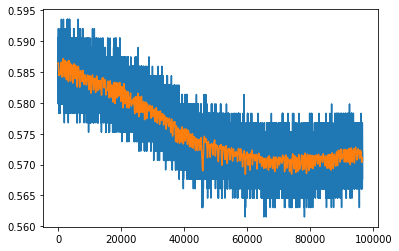

In [19]:
plt.plot(res['df'][["EDA_Raw", "EDA_Filtered"]])

In [20]:
start = acq_df["Scanner Trigger"].where(acq_df["Scanner Trigger"]==0.0).first_valid_index()
end = acq_df["Scanner Trigger"].where(acq_df["Scanner Trigger"]==0.0).last_valid_index()

In [21]:
acq_cut_df = acq_df[(acq_df.index >= start) & (acq_df.index <= end)]
display(acq_cut_df.head())
display(acq_cut_df.tail())

,PPG100C,GSR100C,RSP100C,Scanner TTL,Scanner Trigger
2019-07-10 07:45:49.794886,-0.039368,0.585939,1.538696,-0.001221,0.0
2019-07-10 07:45:49.799886,-0.040588,0.585939,1.521606,-0.000305,0.0
2019-07-10 07:45:49.804886,-0.039978,0.588991,1.506653,-0.000916,5.0
2019-07-10 07:45:49.809886,-0.040588,0.588991,1.493225,0.000000,5.0
2019-07-10 07:45:49.814886,-0.041199,0.582887,1.484375,-0.000610,5.0


,PPG100C,GSR100C,RSP100C,Scanner TTL,Scanner Trigger
2019-07-10 07:53:48.649845,-0.042725,0.573732,4.149170,-0.000610,5.0
2019-07-10 07:53:48.654845,-0.041809,0.569154,4.143677,-0.001526,5.0
2019-07-10 07:53:48.659846,-0.042419,0.573732,4.136047,0.000610,5.0
2019-07-10 07:53:48.664846,-0.042114,0.572206,4.129333,0.000305,0.0
2019-07-10 07:53:48.669846,-0.042419,0.572206,4.118042,-0.000610,0.0
